# Analisis exploratorio de datos

### Indice
1.	Carga de información en un DataFrame
2.	Analizando utilizacion de memoria del dataframe
3.	Conversion de Datos y mejoras en uso de memoria
4.	Verificacion de Calidad de Datos
5.	Analizando propiedades especificas del set de datos


## 1) Carga de informacion en un DataFrame

In [2]:
import pandas as pd
df = pd.read_csv("datos/train.csv", sep=",")
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import folium
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('mode.chained_assignment', None)
pd.options.display.float_format = '{:20,.2f}'.format


%matplotlib inline

import numpy as np

In [3]:
df.sample(3)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
46971,146677,"departamento en venta en gustavo a. madero, di...","<p>muy buen departamento, ubicad&iacute;simo, ...",Apartamento,"Oriente 157, Edificio K",Gustavo A. Madero,Distrito Federal,19.00,2.00,1.00,2.00,79.00,nan,nan,19.49,-99.10,2013-11-01 00:00:00,0.00,0.00,0.00,1.00,0.00,"1,100,000.00"
102503,99192,se vende casa de 3 plantas cerca de finsa,bonita casa de dos plantas en cuautlancingo co...,Casa,av. mexico-puebla ext 169 int 1,Cuautlancingo,Puebla,8.00,3.00,2.00,2.00,122.00,nan,"79,485.00",nan,nan,2016-12-13 00:00:00,0.00,0.00,0.00,0.00,0.00,"1,000,000.00"
215315,95039,casa en san miguel de mezquitan,<p>casa con seis recamaras cerca de av. alcald...,Casa,NaN,Guadalajara,Jalisco,nan,6.00,1.00,2.00,207.00,127.00,"47,336.00",nan,nan,2014-03-08 00:00:00,0.00,0.00,0.00,0.00,0.00,"1,350,000.00"


In [4]:
df.loc[0]

id                                                                       254099
titulo                                                        depto. tipo a-402
descripcion                   depto. interior de 80.15m2, consta de sala com...
tipodepropiedad                                                     Apartamento
direccion                                       Avenida Division del Norte 2005
ciudad                                                            Benito Juárez
provincia                                                      Distrito Federal
antiguedad                                                                  NaN
habitaciones                                                               2.00
garages                                                                    1.00
banos                                                                      2.00
metroscubiertos                                                           80.00
metrostotales                           

In [5]:
# dimensiones del DF
print(df.shape)
df.size # rows x col

(240000, 23)


5520000

### 2 Analizando utilizacion de memoria del dataframe

In [6]:
# veo info general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [7]:
# cantidad de elementos elementos no nulos en el data frame
df.count()

id                            240000
titulo                        234613
descripcion                   238381
tipodepropiedad               239954
direccion                     186928
ciudad                        239628
provincia                     239845
antiguedad                    196445
habitaciones                  217529
garages                       202235
banos                         213779
metroscubiertos               222600
metrostotales                 188533
idzona                        211379
lat                           116512
lng                           116512
fecha                         240000
gimnasio                      240000
usosmultiples                 240000
piscina                       240000
escuelascercanas              240000
centroscomercialescercanos    240000
precio                        240000
dtype: int64

### 3.	Conversion de Datos y mejoras en uso de memoria

#### provincia

In [8]:
df.loc[:,['provincia']].memory_usage()

Index             80
provincia    1920000
dtype: int64

In [9]:
df['provincia'].unique().size

33

In [10]:
df['provincia'].value_counts()

Distrito Federal         58790
Edo. de México           41607
Jalisco                  21238
Querétaro                16988
Nuevo León               15324
Puebla                   10421
San luis Potosí           8447
Yucatán                   7928
Morelos                   7337
Veracruz                  5762
Quintana Roo              4756
Chihuahua                 4590
Coahuila                  3695
Baja California Norte     3220
Sonora                    2988
Guanajuato                2860
Guerrero                  2678
Hidalgo                   2521
Michoacán                 2471
Tamaulipas                2303
Durango                   2275
Sinaloa                   1806
Aguascalientes            1753
Baja California Sur       1700
Nayarit                   1352
Chiapas                   1126
Colima                    1008
Tabasco                    994
Tlaxcala                   839
Oaxaca                     711
Campeche                   263
Zacatecas                   94
Name: pr

In [11]:
# creo una nueva serie en el df de tipo category (enum)
df['provincia'] = df['provincia'].astype('category')

In [12]:
df['provincia'].memory_usage()

241616

In [13]:
df['provincia'].dtype

CategoricalDtype(categories=['Aguascalientes', 'Baja California Norte',
                  'Baja California Sur', 'Campeche', 'Chiapas', 'Chihuahua',
                  'Coahuila', 'Colima', 'Distrito Federal', 'Durango',
                  'Edo. de México', 'Guanajuato', 'Guerrero', 'Hidalgo',
                  'Jalisco', 'Michoacán', 'Morelos', 'Nayarit', 'Nuevo León',
                  'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo',
                  'San luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco',
                  'Tamaulipas', 'Tlaxcala', 'Veracruz', 'Yucatán',
                  'Zacatecas'],
                 ordered=False)

#### Fechas

In [14]:
df.loc[0:0 , 'fecha']

0    2015-08-23 00:00:00
Name: fecha, dtype: object

In [15]:
# Seteamos la fecha al tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'])
# generamos una nueva columna obteniendo el año y mes
df['year'] = df['fecha'].dt.year
df['month'] = df['fecha'].dt.month

In [16]:
df.dtypes

id                                     int64
titulo                                object
descripcion                           object
tipodepropiedad                       object
direccion                             object
ciudad                                object
provincia                           category
antiguedad                           float64
habitaciones                         float64
garages                              float64
banos                                float64
metroscubiertos                      float64
metrostotales                        float64
idzona                               float64
lat                                  float64
lng                                  float64
fecha                         datetime64[ns]
gimnasio                             float64
usosmultiples                        float64
piscina                              float64
escuelascercanas                     float64
centroscomercialescercanos           float64
precio    

#### tipodepropiedad

In [17]:
df['tipodepropiedad'].unique().size

25

In [18]:
df['tipodepropiedad'].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1
Name: tipodepropiedad, dtype: int64

In [19]:
df['tipodepropiedad'] = df['tipodepropiedad'].astype('category')

In [20]:
df['tipodepropiedad'].dtype

CategoricalDtype(categories=['Apartamento', 'Bodega comercial', 'Casa',
                  'Casa en condominio', 'Casa uso de suelo',
                  'Departamento Compartido', 'Duplex', 'Edificio', 'Garage',
                  'Hospedaje', 'Huerta', 'Inmuebles productivos urbanos',
                  'Local Comercial', 'Local en centro comercial', 'Lote',
                  'Nave industrial', 'Oficina comercial', 'Otros',
                  'Quinta Vacacional', 'Rancho', 'Terreno',
                  'Terreno comercial', 'Terreno industrial', 'Villa'],
                 ordered=False)

#### ciudad

In [21]:
df['ciudad'].unique().size

876

In [22]:
df['ciudad'].value_counts()

Querétaro                       12646
Benito Juárez                   11014
Zapopan                         10360
San Luis Potosí                  7925
Mérida                           7162
Monterrey                        6946
Alvaro Obregón                   6633
Cuauhtémoc                       6614
Naucalpan de Juárez              6554
Miguel Hidalgo                   5795
Atizapán de Zaragoza             5783
Tlalpan                          5721
Huixquilucan                     5718
Coyoacán                         5293
Puebla                           4636
Guadalajara                      4006
San Andrés Cholula               3805
Cancún                           3779
Cuernavaca                       3775
Chihuahua                        3757
Tlalnepantla de Baz              3588
Cuautitlán Izcalli               3408
Tlajomulco de Zúñiga             3254
Gustavo A. Madero                3141
Iztapalapa                       3093
Cuajimalpa de Morelos            3020
Tijuana     

In [23]:
df['ciudad'] = df['ciudad'].astype('category')

In [24]:
df['ciudad'].dtype

CategoricalDtype(categories=['Abalá', 'Abasolo', 'Abejones', 'Acajete', 'Acambay',
                  'Acaponeta', 'Acapulco de Juárez', 'Acateno', 'Acatic',
                  'Acatzingo',
                  ...
                  'Zitácuaro', 'Zumpahuacán', 'Zumpango', 'otra', 'ácatlán',
                  'ácatlán de Juárez', 'ácaxochitlán', 'ácámbaro',
                  'áutlán de Navarro', 'áyotlán'],
                 ordered=False)

In [25]:
df.dtypes

id                                     int64
titulo                                object
descripcion                           object
tipodepropiedad                     category
direccion                             object
ciudad                              category
provincia                           category
antiguedad                           float64
habitaciones                         float64
garages                              float64
banos                                float64
metroscubiertos                      float64
metrostotales                        float64
idzona                               float64
lat                                  float64
lng                                  float64
fecha                         datetime64[ns]
gimnasio                             float64
usosmultiples                        float64
piscina                              float64
escuelascercanas                     float64
centroscomercialescercanos           float64
precio    


## 4.	Verificacion de Calidad de Datos

In [26]:
# metricas generales 
df.describe()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,year,month
count,"240,000.00","196,445.00","217,529.00","202,235.00","213,779.00","222,600.00","188,533.00","211,379.00","116,512.00","116,512.00","240,000.00","240,000.00","240,000.00","240,000.00","240,000.00","240,000.00","240,000.00","240,000.00"
mean,"149,969.38",8.12,2.90,1.55,2.13,174.02,176.77,"2,423,467.82",20.70,-99.51,0.06,0.06,0.09,0.44,0.40,"2,530,838.35","2,014.68",7.44
std,"86,634.58",9.55,0.90,0.85,0.91,98.15,94.43,"10,567,938.36",3.14,9.74,0.24,0.23,0.28,0.50,0.49,"2,152,551.80",1.36,3.56
min,1.00,0.00,1.00,0.00,1.00,15.00,15.00,22.00,-100.89,-125.86,0.00,0.00,0.00,0.00,0.00,"310,000.00","2,012.00",1.00
25%,"74,930.75",0.00,2.00,1.00,1.00,90.00,102.00,"24,890.00",19.36,-100.98,0.00,0.00,0.00,0.00,0.00,"952,772.50","2,014.00",4.00
50%,"149,875.50",5.00,3.00,2.00,2.00,153.00,155.00,"56,383.00",19.54,-99.24,0.00,0.00,0.00,0.00,0.00,"1,850,000.00","2,015.00",8.00
75%,"225,016.50",10.00,3.00,2.00,3.00,240.00,238.00,"87,838.00",20.74,-99.13,0.00,0.00,0.00,1.00,1.00,"3,390,000.00","2,016.00",11.00
max,"299,999.00",80.00,10.00,3.00,4.00,439.00,439.00,"50,003,999.00",83.03,121.04,1.00,1.00,1.00,1.00,1.00,"12,525,000.00","2,016.00",12.00


In [27]:
# ver los nulos si existen
df.isnull().any()

id                            False
titulo                         True
descripcion                    True
tipodepropiedad                True
direccion                      True
ciudad                         True
provincia                      True
antiguedad                     True
habitaciones                   True
garages                        True
banos                          True
metroscubiertos                True
metrostotales                  True
idzona                         True
lat                            True
lng                            True
fecha                         False
gimnasio                      False
usosmultiples                 False
piscina                       False
escuelascercanas              False
centroscomercialescercanos    False
precio                        False
year                          False
month                         False
dtype: bool

In [28]:
df.isnull().sum()

id                                 0
titulo                          5387
descripcion                     1619
tipodepropiedad                   46
direccion                      53072
ciudad                           372
provincia                        155
antiguedad                     43555
habitaciones                   22471
garages                        37765
banos                          26221
metroscubiertos                17400
metrostotales                  51467
idzona                         28621
lat                           123488
lng                           123488
fecha                              0
gimnasio                           0
usosmultiples                      0
piscina                            0
escuelascercanas                   0
centroscomercialescercanos         0
precio                             0
year                               0
month                              0
dtype: int64

In [29]:
nulos = pd.DataFrame(df.isnull().sum(), columns=['Nulos'])
nulos['Porcentaje %'] = round(100*nulos['Nulos'] / len(df), 2)
nulos.sort_values ('Porcentaje %', ascending=False)

,Nulos,Porcentaje %
lng,123488,51.45
lat,123488,51.45
direccion,53072,22.11
metrostotales,51467,21.44
antiguedad,43555,18.15
garages,37765,15.74
idzona,28621,11.93
banos,26221,10.93
habitaciones,22471,9.36
metroscubiertos,17400,7.25


In [30]:
nulos.index = nulos.index.set_names(['feature'])
nulos = nulos.reset_index(level='feature')
features = nulos.feature.unique()

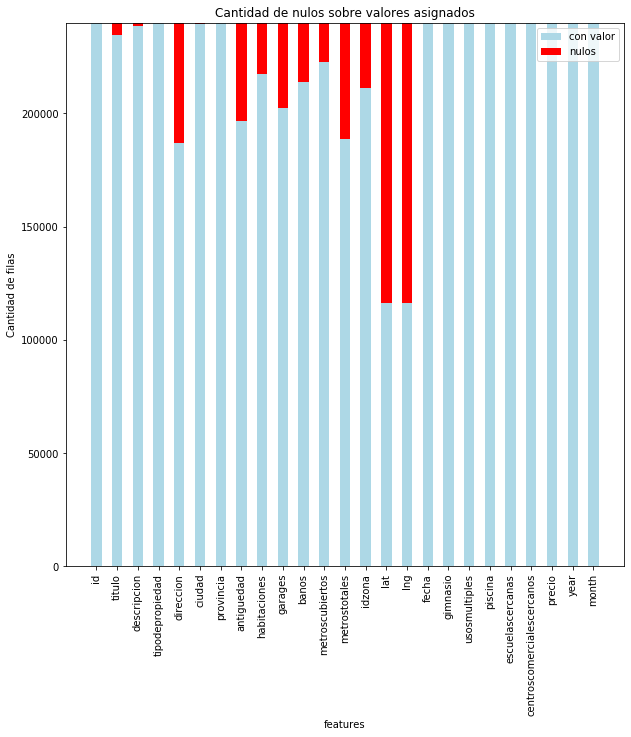

In [37]:
total = 240000
N = len(features)
porc_valor = nulos['Porcentaje %'].map(lambda x: total*((100 - x)/100))
porc_nulos = nulos['Porcentaje %'].map(lambda x: total*(x/100))
ind = np.arange(N)  
width = 0.50      

p1 = plt.bar(ind, porc_valor, width, color='lightblue')
p2 = plt.bar(ind, porc_nulos, width,bottom=porc_valor, color='red')

plt.ylabel('Cantidad de filas')
plt.xlabel('features')
plt.title('Cantidad de nulos sobre valores asignados')
plt.xticks(ind, features)
plt.xticks(rotation=90)
#plt.yticks(np.arange(0, 100, 10))
plt.legend((p1[0], p2[0]), ('con valor', 'nulos'))
plt.rcParams['figure.figsize'] = [10, 10]
ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)
plt.show()

### IDs

In [132]:
# Verifico si son unicos los IDs
df['id'].unique().size == df['id'].count()

True

### Direcciones

In [134]:
# Verifico si son unicas las direcciones
df['direccion'].unique().size == df['direccion'].count()

False

### vamos a buscar cuales son las direcciones duplicadas

In [201]:
# esta funcion devueve las celdas duplicadas
def fduplicados (data, limite):
    return data['Repeticiones'].sum() >= limite

In [202]:
df1 = df.copy()
df1['Repeticiones'] = 1

In [203]:
agrupados = df1.groupby(['direccion'])

In [204]:
agrupadosfiltrados = agrupados.filter(fduplicados, limite=2)

In [205]:
repetidos =agrupadosfiltrados.groupby(['direccion']).agg({'Repeticiones':'sum'})
repetidos.reset_index(inplace=True)

In [206]:
print ("Cantidad de direcciones repetidas")
repetidos["Repeticiones"].sum()

Cantidad de direcciones repetidas


63009

In [207]:
print ("Ranking de direcciones mas repetidas")
repetidos.nlargest(10,'Repeticiones')

Ranking de direcciones mas repetidas


,direccion,Repeticiones
35,-,660
64,.,476
85,1,212
3817,Calle,194
10195,Norte de Mérida,136
16308,x #x,122
77,0,113
15399,domicilio conocido,105
3847,Calle 18 No.344 x 11 y 13 Col. Camara de Comer...,94
15074,calle,94


In [197]:
#con esto accedo directamente
df.loc[df['direccion'].isin(["CASCATA"]), :]

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
160073,164116,casa lomas de angelopolis,lujos espacios ubicación y plenitud en cluster...,Casa,CASCATA,San Andrés Cholula,Puebla,nan,3.00,2.00,...,"334,898.00",nan,nan,2015-04-12 00:00:00,1.00,0.00,0.00,0.00,0.00,"1,730,000.00"
208408,70102,"lomas angelopolis, exclusivo terreno¡",nuevo cluster residencial llamado gran reserv...,Terreno,CASCATA,San Andrés Cholula,Puebla,nan,nan,0.00,...,"334,898.00",nan,nan,2016-12-05 00:00:00,0.00,0.00,0.00,1.00,1.00,"1,900,000.00"
230351,260226,venta casa en lomas de angelopolis cascata en...,magnifico diseño y acabados casas en pre- vent...,Casa en condominio,CASCATA,San Andrés Cholula,Puebla,0.00,4.00,2.00,...,"334,898.00",18.98,-98.29,2016-03-17 00:00:00,0.00,1.00,0.00,1.00,1.00,"2,700,000.00"


## 5) Analizando propiedades especificas del set de datos